In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from functions import CFloader, splt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt

savedir = "B01/"

In [8]:
data = CFloader.load_data( "CloudVenetoAnalysis/default_20220515_0" )
# data = CFloader.load_data( "AcerAnalysis/default_20220515_31" )
if( len( data ) > 0 ):
    data = data[ np.vectorize( lambda i: i['gamma'] )(data).argsort() ]
else:
    print("No data!")
fitlim = 11

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


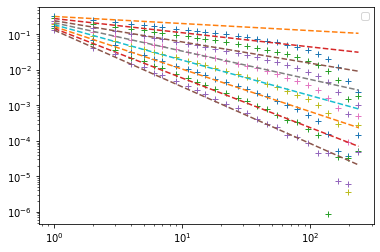

In [9]:
for d in data:
    x = np.array( d['CF_D']['x'] )
    y = np.abs( np.array( d['CF_D']['y'] ) )
    logx = np.log10( x )
    logy = np.log10( y )
    plt.plot( x,  y, '+' )

    def f( x, A, gamma ):
        return - gamma * x + A
    p, pc = curve_fit( f, logx[ x < fitlim ], logy[ x < fitlim ], [ logy[0], d['gamma'] ] )
    y2 = 10 ** f( logx, p[0], p[1] )
    compat = ( abs( p[1] - d['gamma'] ) / sqrt( pc[1,1] ) )

    # plt.plot( x, y2, label = fr"${p[1]:.3f} \pm {sqrt(pc[1,1]):.3f}$ ({compat:.1f}) {'✓' if compat < 2 else 'x'}" ) 
    plt.plot( x, 10 ** f( logx, p[0], d['gamma'] ), '--' ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )
    plt.legend()

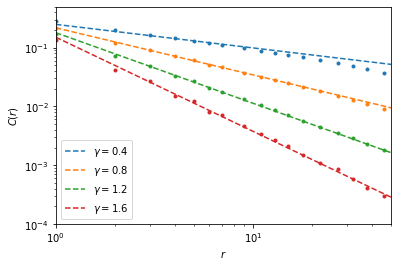

In [22]:
# Save data
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
to_plot = [0.4, 0.8, 1.2, 1.6]
i = -1

for d in data:
    g = d['gamma']
    if( ( len(to_plot) > 0 ) and ( g not in to_plot ) ):
        continue

    i = i + 1
    x = np.array( d['CF_D']['x'] )
    y = np.abs( np.array( d['CF_D']['y'] ) )

    def f( x, A, gamma ):
        return ( x**2 ) ** ( - gamma / 2 ) * A
        
    A = np.mean( y[:10] / f( x[:10], 1, g ) )

    plt.plot( x,  y, '.', color = cols[i] )
    plt.plot( x, f( x, A, g), '--', color = cols[i], label=fr"$\gamma = {g:.1f}$" ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )
    plt.legend()
    plt.xlim( 1e0, 5e1 )
    plt.ylim( 1e-4, 5e-1 )
    plt.xlabel( fr"$r$" )
    plt.ylabel( fr"$C(r)$" )
    plt.savefig( savedir + "CF.pdf" )

In [16]:
i

4

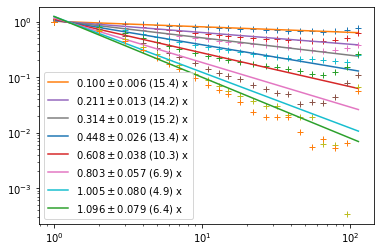

In [54]:
for d in data:
    x = np.array( d['CF_H']['x'] )
    y = np.abs( np.array( d['CF_H']['y'] ) )
    y = y / np.max( y )
    logx = np.log10( x )
    logy = np.log10( y )
    plt.plot( x,  y, '+' )

    def f( x, A, gamma ):
        return - gamma * x + A
    p, pc = curve_fit( f, logx[ x < fitlim ], logy[ x < fitlim ], [ logy[0], d['gamma'] ] )
    y2 = 10 ** f( logx, p[0], p[1] )
    compat = ( abs( p[1] - d['gamma'] ) / sqrt( pc[1,1] ) )

    plt.plot( x, y2, label = fr"${p[1]:.3f} \pm {sqrt(pc[1,1]):.3f}$ ({compat:.1f}) {'✓' if compat < 2 else 'x'}" ) 
    plt.plot( x, f( x, p[0], d['gamma'] ), '--' ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )
    plt.legend()